 # Лабораторна робота 3 та 4 
##  ФБ - 31мп 
## Приходько Андрій & Шахова Катерина

In [35]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
import nltk 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
dataset = 'mail_data.csv'

In [55]:
data = pd.read_csv(dataset)

In [56]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
data_to_clear = data['Message'].values

In [58]:
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [8]:
clean_data = []

In [9]:
for text in data_to_clear:
     clean_data.append(clean_text(text))

In [10]:
data['Message']=clean_data

In [11]:
data.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


In [12]:
data['Category'] = data['Category'].map({'spam':1, 'ham': 0})

In [13]:
data.head()

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though


In [14]:
X = data["Message"]
y = data["Category"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Logistic Regression

In [17]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_features, y_train.values)  

LogisticRegression()

In [18]:
y_pred_log = logistic_reg.predict(X_test_features)

In [19]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.97      0.73      0.83       207

    accuracy                           0.96      1672
   macro avg       0.97      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



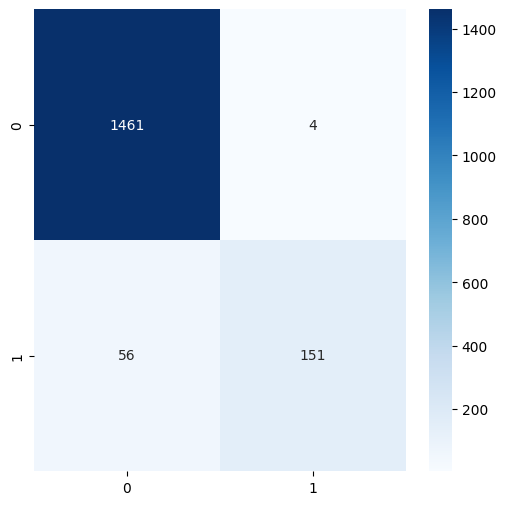

In [53]:
plt.figure(figsize=(6, 6))
cm=confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.show()

# Linear regression

In [21]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_features, y_train.values)  

LinearRegression()

In [22]:
y_pred_lin = linear_reg.predict(X_test_features)
y_pred_lin = np.round(y_pred_lin).astype(int)

In [60]:
print(classification_report(y_test,y_pred_lin))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.97      0.96      0.96      1465
           1       0.79      0.79      0.79       207
           2       0.00      0.00      0.00         0

    accuracy                           0.94      1672
   macro avg       0.44      0.44      0.44      1672
weighted avg       0.95      0.94      0.94      1672



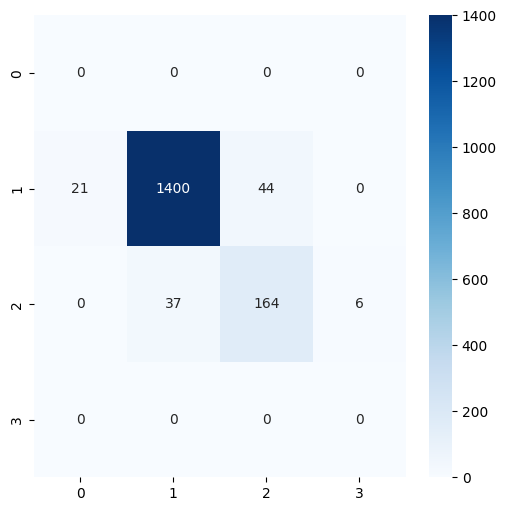

In [52]:
plt.figure(figsize=(6, 6))
cm=confusion_matrix(y_test, y_pred_lin)
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.show()

# SVM

In [26]:
clf = svm.SVC()

In [27]:
clf.fit(X_train_features, y_train.values)

SVC()

In [28]:
y_pred_svm = clf.predict(X_test_features)

In [29]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1465
           1       1.00      0.86      0.92       207

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



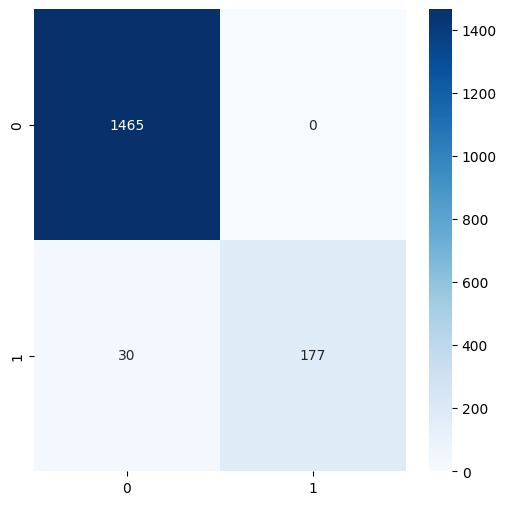

In [51]:
plt.figure(figsize=(6, 6))
cm=confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
plt.show()

In [38]:
print(confusion_matrix(y_test, y_pred_svm))

[[1465    0]
 [  30  177]]
